In [1]:
import numpy as np
import pandas as pd
import os
import re

from textblob import TextBlob

from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/tweets-about-recession-in-india-2023/recession_2023_india_tweets_dataset.csv


In [3]:
input_data = pd.read_csv('/kaggle/input/tweets-about-recession-in-india-2023/recession_2023_india_tweets_dataset.csv')

In [4]:
input_data.head()

,date,id,content,username,likeCount,retweetCount
0,2022-11-30 04:17:49+00:00,1597807084934172672,📌 @elonmusk begins hiring for Twitter 2.0 afte...,workflexitweets,1,1
1,2022-11-30 02:48:10+00:00,1597784522728558592,"Global Recession से दुनिया हुई बेहाल, लेकिन In...",indilinks,0,0
2,2022-11-29 17:21:57+00:00,1597642029479038976,Will global recession impact India or not? #re...,BizzBuzzNews,0,0
3,2022-11-29 11:40:40+00:00,1597556142213070850,Is Recession In India Coming Soon?\n\nWant to ...,Anubhav74782862,0,0
4,2022-11-29 10:12:57+00:00,1597534071202385922,A report by #realestate data collation &amp; r...,indiaoutbound,1,0


In [5]:
input_data.shape

(5176, 6)

In [6]:
df = input_data.copy()

In [7]:
df.drop_duplicates(inplace = True)

In [20]:
    '''This function is to clean the tweets.
    #Removing @mentions,  '#' hash tag, RT,
    remove @ mentions, removing leading and trailing whitespaces,
    and removing hyperlink
    '''

def cleanTwt(twt):
     twt = re.sub('@[A-Za-z0–9]+', '', twt) 
     twt = re.sub('#', '', twt) 
     twt = re.sub('RT[\s]+', '', twt) 
     twt = re.sub('\n', '', twt)
     twt = re.sub('@[\S]*', '',twt) 
     twt = re.sub('^[\S]+|[\S] + $', '', twt) 
     twt = re.sub('https?:\/\/\S+', '', twt) 
     return twt




In [21]:
# New column called Cleaned tweets
df['Cleaned_Tweets'] = df['content'].apply(cleanTwt)
df['Cleaned_Tweets'].head()

0      begins hiring for Twitter 2.0 after firing n...
1     Recession से दुनिया हुई बेहाल, लेकिन India ने...
2     global recession impact India or not? recessi...
3     Recession In India Coming Soon?Want to know r...
4     report by realestate data collation &amp; res...
Name: Cleaned_Tweets, dtype: object

In [22]:
def get_sentiment(text):
    '''Classify the polarity of the tweet'''
    
    analysis = TextBlob(text)
    return 'positive' if analysis.sentiment.polarity > 0 else 'negative' if analysis.sentiment.polarity < 0 else 'neutral'

df['sentiment'] = df['Cleaned_Tweets'].apply(get_sentiment)


In [23]:
df.head()

,date,id,content,username,likeCount,retweetCount,Cleaned_Tweets,sentiment
0,2022-11-30 04:17:49+00:00,1597807084934172672,📌 @elonmusk begins hiring for Twitter 2.0 afte...,workflexitweets,1,1,begins hiring for Twitter 2.0 after firing n...,positive
1,2022-11-30 02:48:10+00:00,1597784522728558592,"Global Recession से दुनिया हुई बेहाल, लेकिन In...",indilinks,0,0,"Recession से दुनिया हुई बेहाल, लेकिन India ने...",neutral
2,2022-11-29 17:21:57+00:00,1597642029479038976,Will global recession impact India or not? #re...,BizzBuzzNews,0,0,global recession impact India or not? recessi...,neutral
3,2022-11-29 11:40:40+00:00,1597556142213070850,Is Recession In India Coming Soon?\n\nWant to ...,Anubhav74782862,0,0,Recession In India Coming Soon?Want to know r...,neutral
4,2022-11-29 10:12:57+00:00,1597534071202385922,A report by #realestate data collation &amp; r...,indiaoutbound,1,0,report by realestate data collation &amp; res...,negative


In [24]:
df.shape

(5176, 8)

# Plot the word cloud separately for Positive , Neutral and negative sentiment tweets

________________________________________________________________________________________________


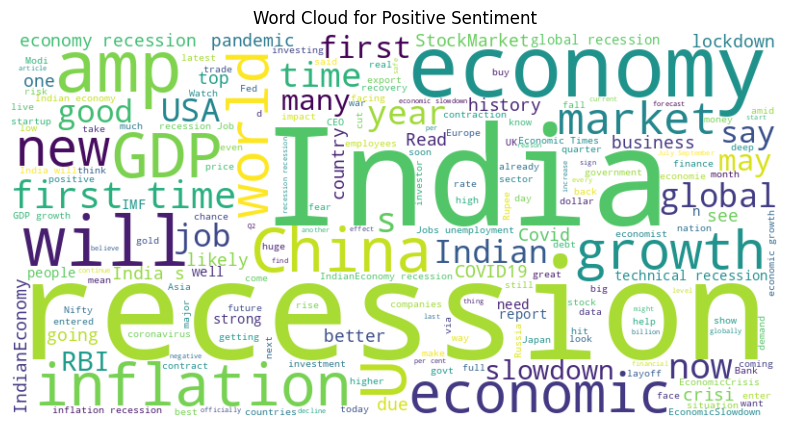

________________________________________________________________________________________________


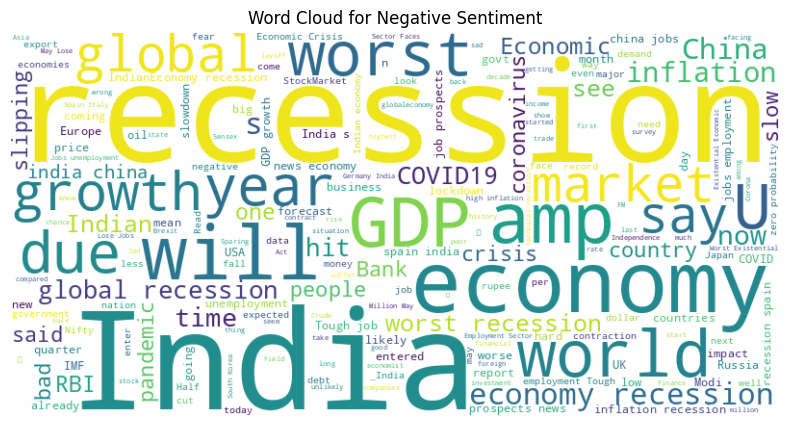

________________________________________________________________________________________________


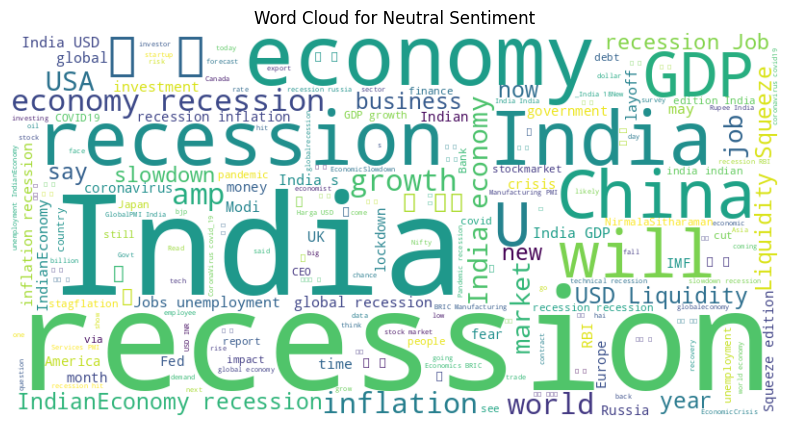

In [25]:
def plot_wordcloud(sentiment_category, dataframe):
    
    '''Generate a word cloud for the specified sentiment category. 
    And plot the word cloud'''
    
    sentiment_tweets = dataframe[dataframe['sentiment'] == sentiment_category]['Cleaned_Tweets'].str.cat(sep=' ')
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(sentiment_tweets)
 
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment_category.capitalize()} Sentiment')
    plt.axis('off')
    print("__"*48)
    plt.show()

plot_wordcloud('positive', df)
plot_wordcloud('negative', df)
plot_wordcloud('neutral', df)


# Analyze Popular Keywords in Retweeted Tweets

Extracting the tweets that have higher retweet counts and analyze the keywords or topics that appear more frequently.

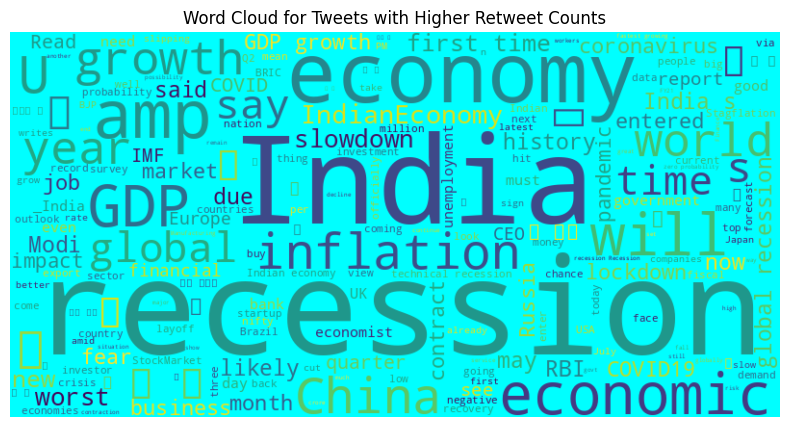

In [26]:
high_retweet_tweets = df[df['retweetCount'] > df['retweetCount'].mean()]

# Concatenate the text of high retweet tweets
high_retweet_text = ' '.join(high_retweet_tweets['Cleaned_Tweets'])
# Generate a word cloud for high retweet tweets
wordcloud_high_retweet = WordCloud(width=800, height=400, background_color='cyan').generate(high_retweet_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_high_retweet, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Tweets with Higher Retweet Counts')
plt.show()

# Visualize the distribution of sentiments

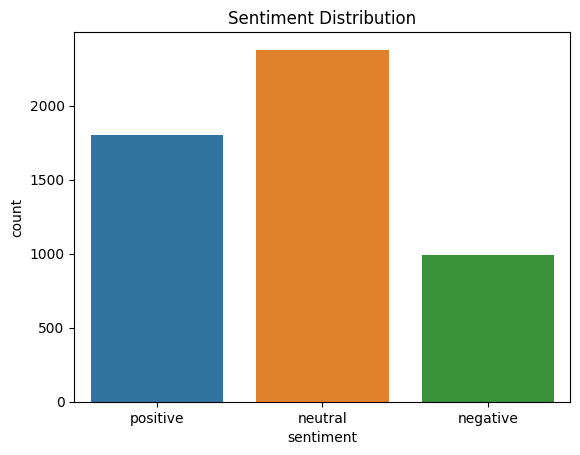

In [27]:
sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Distribution')
plt.show()


# Sentiment Trends Over Time:
Analyze how sentiment changes over time 

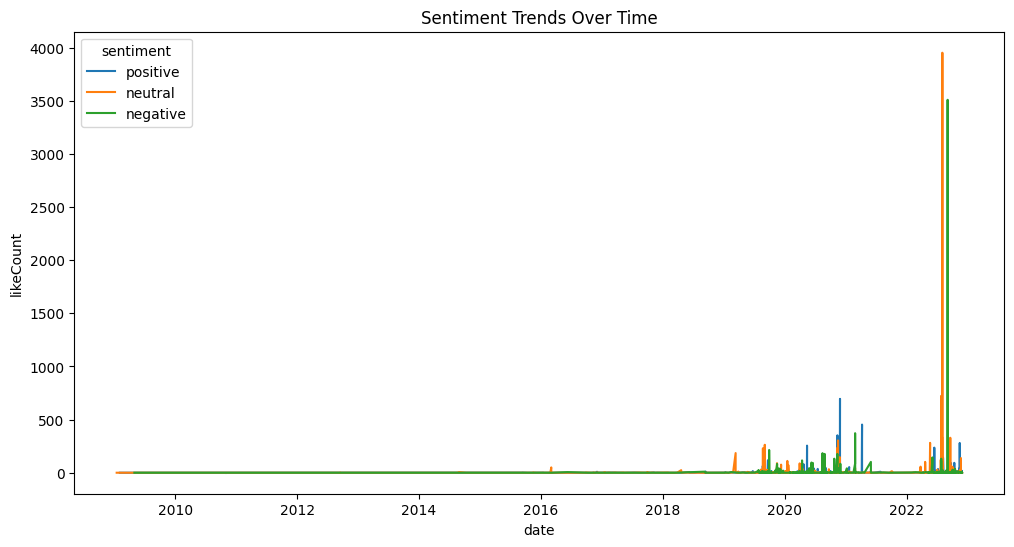

In [28]:
df['date'] = pd.to_datetime(df['date'])
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='likeCount', hue='sentiment', data=df)
plt.title('Sentiment Trends Over Time')
plt.show()


# Impact of Likes and Retweets

Exploring how likes and retweets correlate with sentiment.

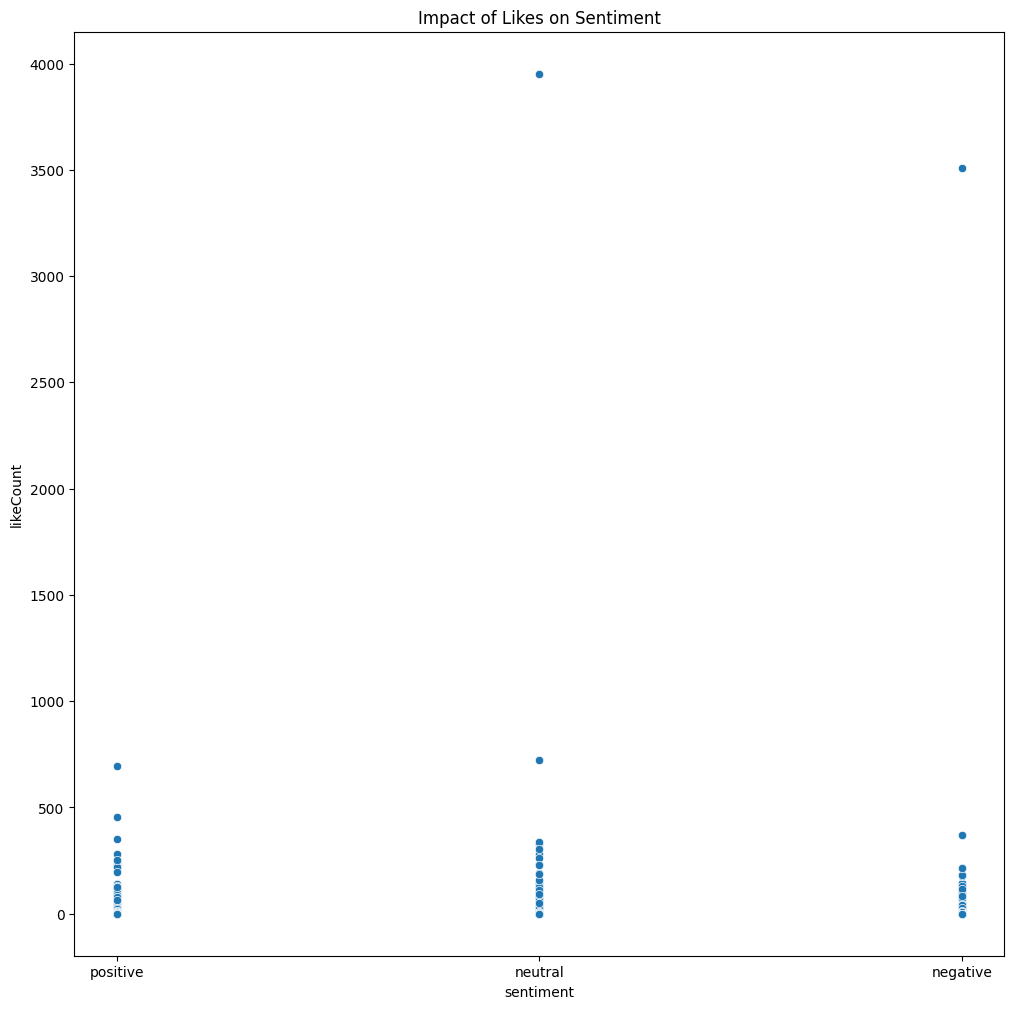

In [29]:
plt.figure(figsize=(12, 12))
sns.scatterplot(x='sentiment', y='likeCount', data=df)
plt.title('Impact of Likes on Sentiment')
plt.show()

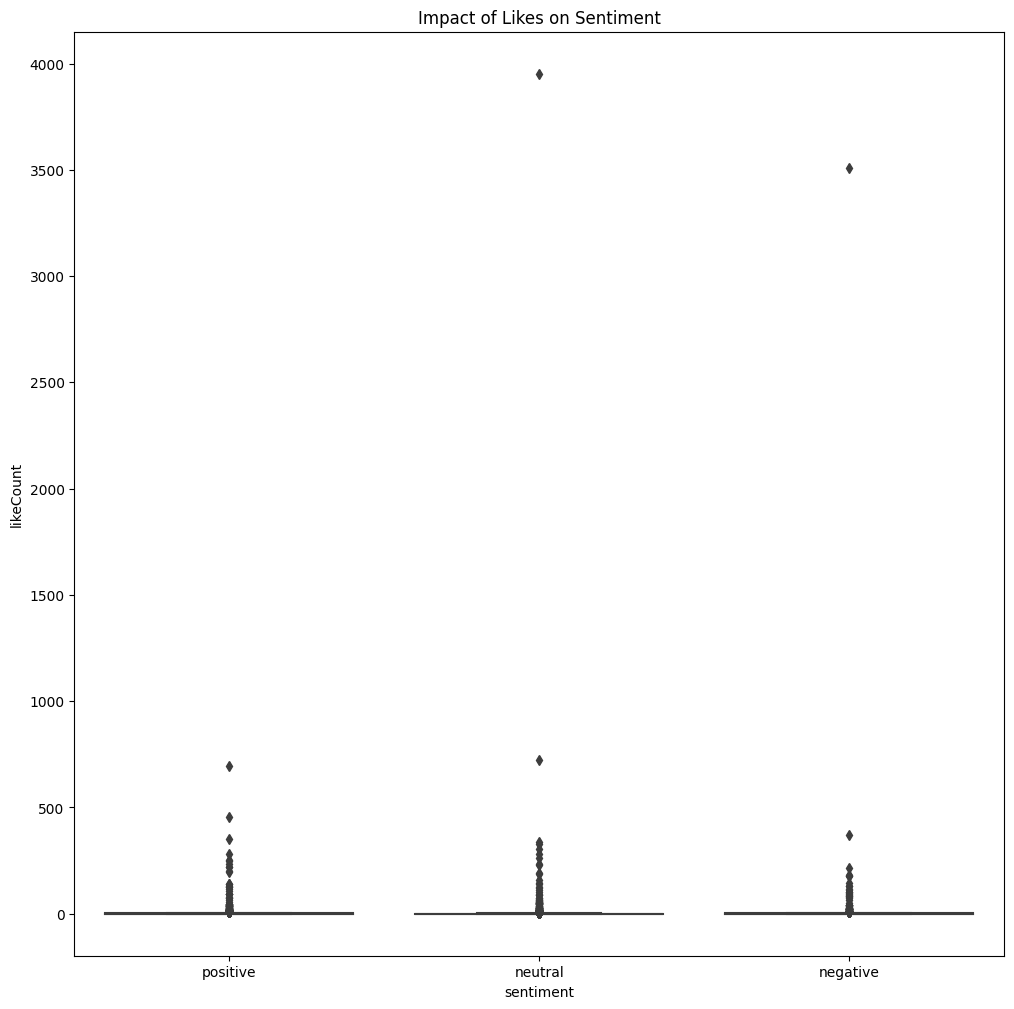

In [30]:
plt.figure(figsize=(12, 12))
sns.boxplot(x='sentiment', y='likeCount', data=df)
plt.title('Impact of Likes on Sentiment')
plt.show()


# Aggregate Sentiments based on the username

In [31]:
def analyze_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

df['Sentiment_Score'] = df['Cleaned_Tweets'].apply(analyze_sentiment)

# Aggregate sentiment scores by username
aggregate_sentiments = df.groupby('username')['Sentiment_Score'].mean().reset_index()
# Categorize sentiments into positive, negative, or neutral
def categorize_sentiment(score):
    return 'positive' if score > 0 else 'negative' if score < 0 else 'neutral'


aggregate_sentiments['Aggregate_Sentiment'] = aggregate_sentiments['Sentiment_Score'].apply(categorize_sentiment)
print(aggregate_sentiments)


            username  Sentiment_Score Aggregate_Sentiment
0         08Saikumar         0.175000            positive
1           0Umairaj         0.000000             neutral
2        1973GJWEcon         0.000000             neutral
3            1985jay         0.175000            positive
4           1996_ajc         0.000000             neutral
...              ...              ...                 ...
3119       zega_tron         0.000000             neutral
3120        zippyway         0.096591            positive
3121        zoominvj         0.000000             neutral
3122      zuberjafri         0.450000            positive
3123  zubinsomervell         0.000000             neutral

[3124 rows x 3 columns]


Separating positive, negative and neutral tweets based on username

In [32]:
positive_df = aggregate_sentiments[aggregate_sentiments['Aggregate_Sentiment'] == 'positive']
neutral_df = aggregate_sentiments[aggregate_sentiments['Aggregate_Sentiment'] == 'neutral']
negative_df = aggregate_sentiments[aggregate_sentiments['Aggregate_Sentiment'] == 'negative']

print("Positive Sentiments:")
print(positive_df)

print("\nNeutral Sentiments:")
print(neutral_df)

print("\nNegative Sentiments:")
print(negative_df)

Positive Sentiments:
           username  Sentiment_Score Aggregate_Sentiment
0        08Saikumar         0.175000            positive
3           1985jay         0.175000            positive
6       1richasingh         0.375000            positive
9             366pi         0.064610            positive
11      3tarungupta         0.150000            positive
...             ...              ...                 ...
3109       yestoaap         0.203968            positive
3110  yesudasantony         0.250000            positive
3115      zaggleapp         0.250000            positive
3120       zippyway         0.096591            positive
3122     zuberjafri         0.450000            positive

[1243 rows x 3 columns]

Neutral Sentiments:
            username  Sentiment_Score Aggregate_Sentiment
1           0Umairaj              0.0             neutral
2        1973GJWEcon              0.0             neutral
4           1996_ajc              0.0             neutral
7      24taasChan

# Check if the same user (feature-username) has made tweets with different sentiments at different times

In [33]:
differing_sentiments = df.groupby('username')['Sentiment_Score'].nunique()
usernames_with_differing_sentiments = differing_sentiments[differing_sentiments > 1].index.tolist()

print("\nUsernames with Different Sentiments at Different Times:")
print(usernames_with_differing_sentiments)


Usernames with Different Sentiments at Different Times:
['1richasingh', '366pi', '5paisa', 'A2KEnterprises', 'ABPNews', 'ACSouthAsia', 'AKLalB', 'AYaaN27J', 'AboveStocks', 'AdvocateIndian', 'AjaySachapara', 'AlanTonelson', 'AlokBhinde', 'AlokKrIndia', 'AmanGill_89', 'AmitGoelTweets', 'AmitSurpuriya', 'Analyticsindiam', 'AniketLimani', 'Animesh_India', 'Anubhav74782862', 'AshrafEngineer', 'AtanuPa22454790', 'AtiqueNaqvi', 'AvisharDutta', 'BFSIPost', 'BWBusinessworld', 'BadCreditBook', 'BagalueSunab', 'Bansaljiiii', 'BarveNutan', 'BellamSwathi', 'BiIndia', 'BigilTamilan', 'BizzBuzzNews', 'BoilerRoomTweet', 'BullionEx', 'CAacademycom', 'CFO_India', 'CNBCTV18Live', 'CNBCTV18News', 'CNBCTheExchange', 'CNX500', 'CapitalGains85', 'Cartoon_Shaunak', 'Chandanbadguja1', 'ChuckDalldorf', 'CloutNewsMedia', 'ConcernedSK', 'DNB_India', 'DeccanHerald', 'DemocracyNewsL', 'DevEconNetwork', 'Dipal', 'Divya_India_ask', 'EIIRTrend', 'EOFmarketexpert', 'ETNOWlive', 'ETRetail', 'ET_ILC', 'EconomicShelter',

#  Identify usernames with higher retweet counts

In [34]:
high_retweet_usernames = df.groupby('username')['retweetCount'].sum().sort_values(ascending=False)
print("Usernames with Higher Retweet Counts:")
print(high_retweet_usernames.head(10))

Usernames with Higher Retweet Counts:
username
satishacharya     782
InsightGL         736
samirsinh189      444
thewirehindi      306
BanglarGorboMB    252
sagarikaghose     237
NH_India          210
business_today    151
firstpost         104
Shikha__Rawat     101
Name: retweetCount, dtype: int64
